Обучение модели Yolov8

In [ ]:
# устанавливаем среду для скачивания модели Yolov8
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.3/723.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
# скачиваем фреймворк от pytorch
!pip install torch torchvision
# библиотека для работы с многомерными массивами Numpy
!pip install numpy opencv-python

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
#импортируем доступ к диску
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os # библиотека для работы с файлами
from torchvision import transforms # библиотека для различных действий с помощью Pytorch
from PIL import Image
from ultralytics import YOLO
import torch.nn.functional as func

model = YOLO("yolov5s.pt")

data_train = "/content/drive/MyDrive/Сириус/train_model"

if os.path.exists(data_train):
    transform = transforms.Compose([
        transforms.Resize((640, 640)),
        transforms.ToTensor()
    ])

    images = []
    for root, _, files in os.walk(data_train): # проходимся по каждому файлу в папке data_train
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png"): # на всякий случай добавляем проверку
                img_path = os.path.join(root, file) # создаём пут к изображению
                img = Image.open(img_path) # открываем
                img = transform(img).unsqueeze(0) # трансформируем в tensor (многомерные массивы) для подачи в модель
                img_train = func.interpolate(img, size=(640, 640), mode='bilinear', align_corners=False) # дополнительно изменяем модель
                images.append(img_train) # добавляем в список для обучения

    # обучаем модель
    results = model.train(
    data=images,
    imgsz=640,
    epochs=50,
    batch_size=6,  # Обычно используется 8, но я решил уменьшить для упращение задачи вычислений, но и это не помогло..
    name='yolov8s'
)
else:
    print("Папки нет")

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



## К сожалению, получилось так, что при обучении модели на моём ноутбуке заканчивалась оперативная память и программа оставливалась. При импортировании модели таким образом: model = YOLO("yolov5s.pt"). Должен автоматически использоваться CPU (Центральный процессор) для того, чтобы избавить перенапряжение Оперативной памяти, но я также отдельно подключать его использование .cpu(), что опять же не привело к нужному результату. Возможно я что-то написал не так, если заметите буду рад исправить и показать обученную модель уже на финале!!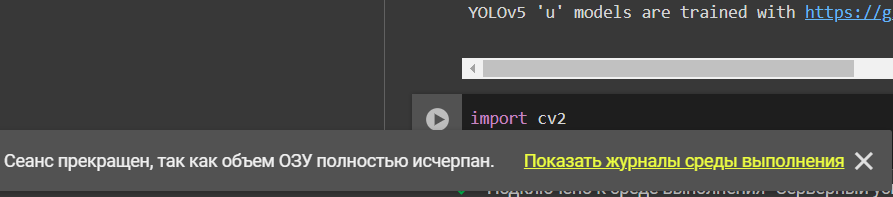

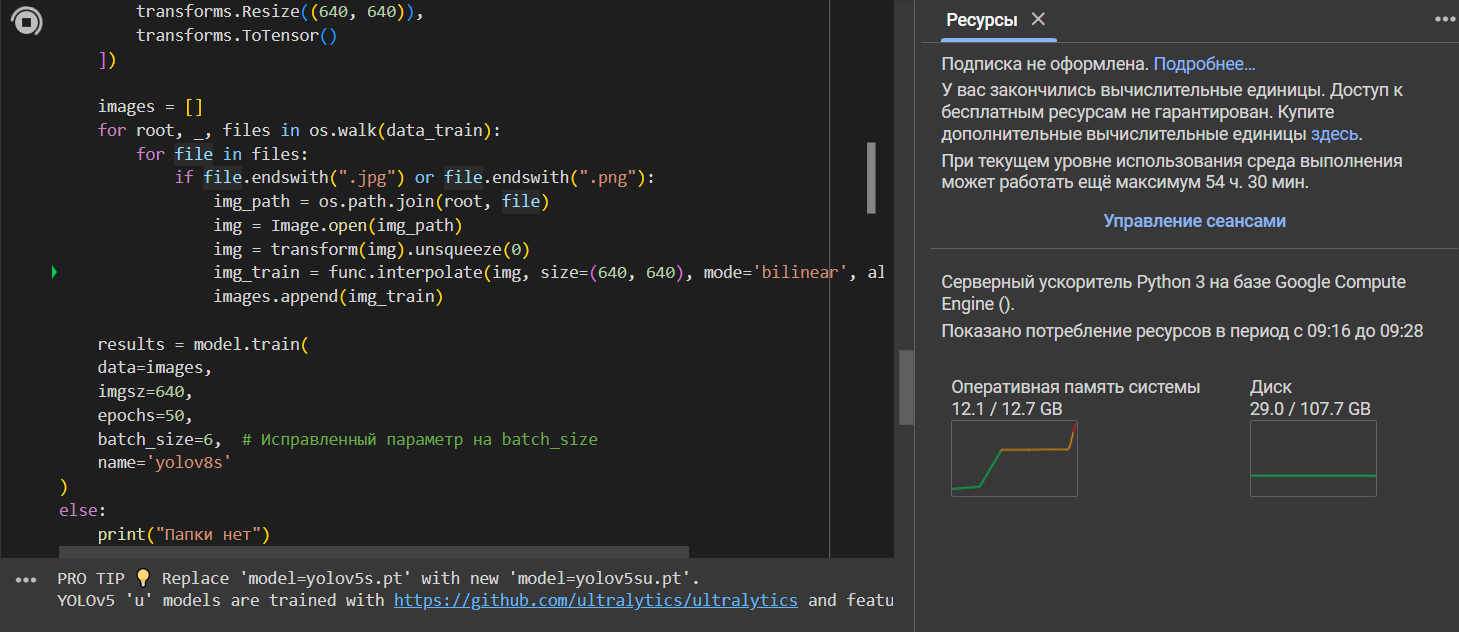


0: 640x640 20 persons, 1 backpack, 2 handbags, 1 clock, 2029.8ms
Speed: 0.1ms preprocess, 2029.8ms inference, 49.2ms postprocess per image at shape (1, 3, 640, 640)
На изображение 20 человек, примерное ожидание в очереди 13мин


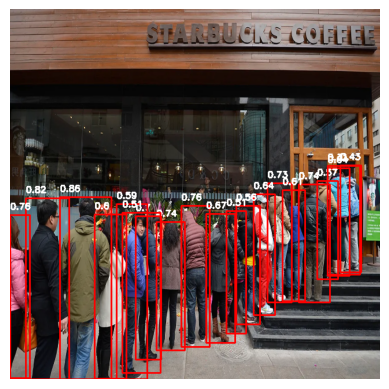

In [ ]:
import cv2
import torch
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import torch.nn.functional as func
import pandas as pd
from ultralytics import YOLO

model = YOLO("yolov8s.pt")

def detect_people(image_path):
    input_img = Image.open(image_path)

    transform = transforms.Compose([
        transforms.Resize((640, 640)),
        transforms.ToTensor()
    ])

    img = transform(input_img).unsqueeze(0) # преобразуем в многомерный массив для подачи изображения в модель
    output_tensor = func.interpolate(img, size=(640, 640), mode='bilinear', align_corners=False)
    # модель принимает изображение в формате 640*640, значит необходимо преобразовать входное в такой формат

    with torch.no_grad():
        results = model(output_tensor) # передаём значения в модель

    prediction = results[0] # получаем результаты модели
    res_predict = prediction.cpu().numpy() # выделяем целевую переменную с результатом

    names = res_predict.names # название объектов, которые может определять модель
    image_np = np.array(input_img)
    # преобразуем изначальное фото в numpy, так как для рисования rectangle должен быть numpy массив
    resized_image = cv2.resize(image_np, (640, 640))
    # изменения изначального размера

    count = 0
    for box in res_predict.boxes:
        class_id = res_predict.names[box.cls[0].item()] # объявляем объект, который мы определили
        if class_id == 'person':
          count+=1 # кол человек
          cords = box.xyxy[0].tolist() # получаем координаты прямоугольников из box (x1, y1, x2, y2)
          cords = [round(x) for x in cords] # получаем список с округлёнными значениями
          conf = round(box.conf[0].item(), 2) # параметры точности модели configuration score
          cords = [int(c) for c in cords] # из str преобразуем в int
          cv2.rectangle(resized_image, (cords[0], cords[1]), (cords[2], cords[3]), (255, 0, 0), 2) # рисуем квадраты
          cv2.putText(resized_image, f"{conf}", (cords[0], cords[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2) #

    # Выводим резьтат на экран
    time_in_line = count * 40 / 60
    print(f"На изображение {count} человек, примерное ожидание в очереди {round(time_in_line)}мин")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2BGRA))
    plt.axis('off')
    plt.show()

detect_people('/content/test1.webp')